# Convert to tiff

In [ ]:
!dcraw -d -4 -T DSC-008634.NEF

# Read image, adjust curves

In [1]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# Image is in grayscale
img = cv2.imread("DSC-008634.tiff", cv2.IMREAD_GRAYSCALE)

In [3]:
img.shape

(4040, 6064)

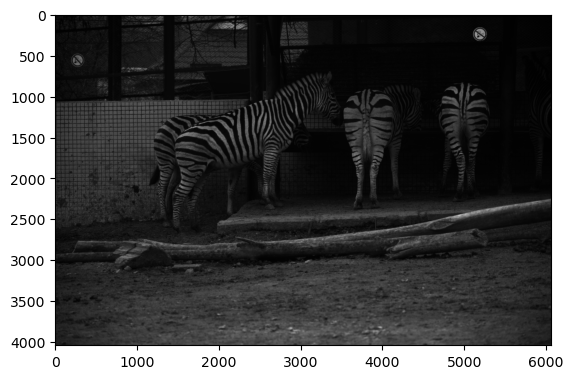

In [4]:
plt.imshow(img, cmap="gray")

### Brightness

In [5]:
img = np.power(img, 0.6)

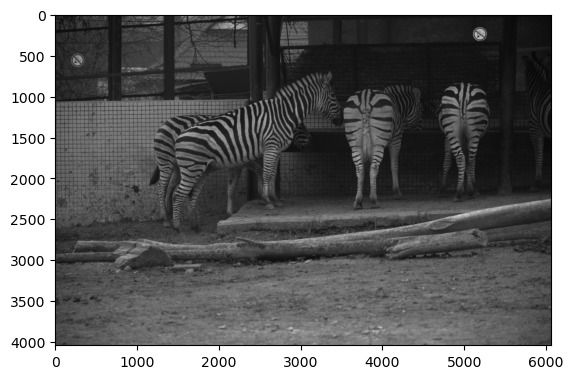

In [6]:
plt.imshow(img, cmap="gray")

### Contrast

In [7]:
img = np.sin(img / img.max() * np.pi / 2)
img = img / img.max()

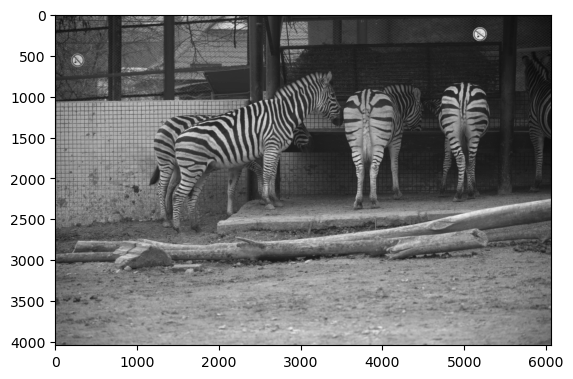

In [8]:
plt.imshow(img, cmap="gray")

In [9]:
img = np.sin(img / img.max() * np.pi / 2)
img = img / img.max()

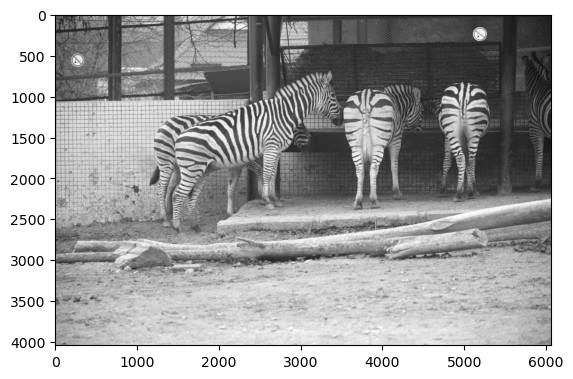

In [10]:
plt.imshow(img, cmap="gray")

# Convert to color

In [11]:
torch_img = torch.tensor(img).unsqueeze(0).unsqueeze(0).to(torch.float)

Debayer. Simple algorythm.

Bayer filter is:
```
RGRGRGRG
GBGBGBGB
RGRGRGRG
GBGBGBGB
RGRGRGRG
GBGBGBGB
```

So, its cell is 
```
RG
GB
```

Let's use only R as red, mean of G as green and B as blue.

In [12]:
kernel = torch.FloatTensor(
    [
        [[[1, 0], [0, 0]]], 
        [[[0, 0.5], [0.5, 0]]], 
        [[[0, 0], [0, 1]]], 
    ],
)

In [13]:
processed = torch.nn.functional.conv2d(torch_img, weight=kernel, stride=2, padding=0).squeeze(0).permute(1, 2, 0).numpy()

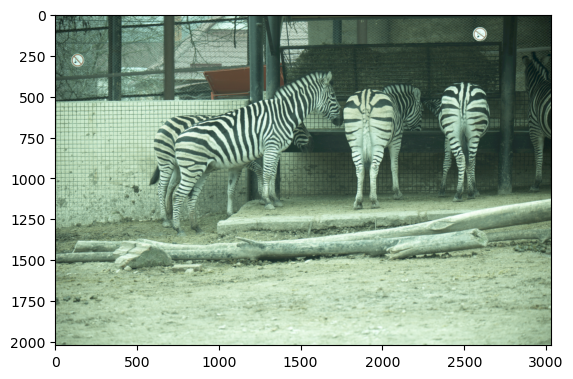

In [14]:
plt.imshow(processed / processed.max())

In [15]:
processed.shape  # Initial image was bigger!

(2020, 3032, 3)

# While balance

White balance is still wrong. Let's use zebra's white color as sample of real white. It has approximate coordinates 750, 1950.
It is too simple but it works :)

In [16]:
wb_coef = 1 / processed[775, 1975]
print(wb_coef)

[1.2927568 1.1145939 1.2434183]


In [17]:
for i, multiplier in enumerate(wb_coef):
    processed[:, :, i] = processed[:, :, i] * multiplier

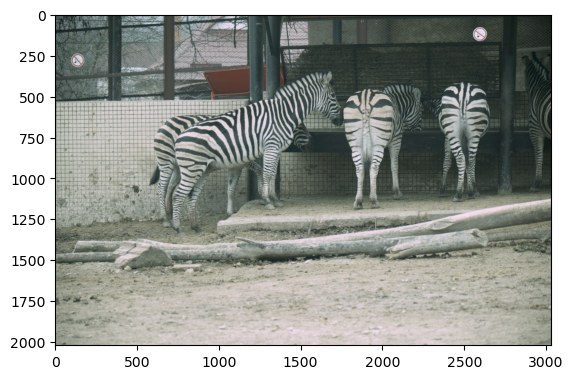

In [18]:
plt.imshow(processed / processed.max())

Looks acceptable :)

# Jpeg from camera

In [19]:
colored = cv2.imread("DSC-008634.JPG")
colored = cv2.cvtColor(colored, cv2.COLOR_BGR2RGB)

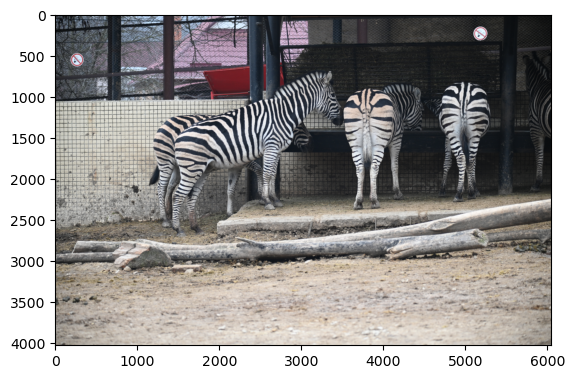

In [20]:
plt.imshow(colored)